## Summer 2022 Data Science Intern Challenge at Shopify
### by Sarwari Das


Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


#### Reading data

In [139]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import altair as alt

df = pd.read_csv(os.getcwd() + "/00_source_data/data.csv", parse_dates=["created_at"])
df["date"] = df.created_at.dt.date
# df.info()
df.sample(5)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,date
3216,3217,21,868,142,1,credit_card,2017-03-19 00:25:36,2017-03-19
69,70,58,876,138,1,debit,2017-03-04 10:38:49,2017-03-04
4563,4564,20,995,254,2,credit_card,2017-03-03 11:48:24,2017-03-03
1708,1709,98,956,266,2,credit_card,2017-03-20 10:53:58,2017-03-20
258,259,75,760,512,4,cash,2017-03-18 08:19:53,2017-03-18


#### Exploring the data

1. Sanity checks: 
- Check number of unique sneaker shops
- Check for nulls in data
- Check datatypes of columns
- Reproduce AOV of $3145.13 for 30 day period

In [140]:
assert df.shop_id.nunique() == 100  # 100 shops as mentioned in the problem
assert (
    df.date.nunique() == 30
)  # There are 30 days in total, we don't need to subset the data
df.isna().sum()  # no null values across columns
df.dtypes  # datatypes are as expected
print(f"AOV over 30 day period is ${np.round(df.order_amount.mean(),2)}")


AOV over 30 day period is $3145.13


My initial suspicion is that the above statistic is sensitive to outliers, which drives the average value of a sneaker up. Although sneakers are usually an affordable item, there is still quite a lot of variance in the price of sneakers due to limited edition/designer sneakers that are collectibles are hence relatively expensive. Let's examine this distribution further.

2. Summary Statistics

In [141]:
df.order_amount.describe()


count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

The most expensive shoe is $704,000! 

That's definitely biasing our results. The figures below show the distribution of the prices with a limit on price set at $1000 (I think that's reasonable given that the third quartile is $390). We can see that the prices for most shoes fall between the $200 - $400 range so its most likely that if we didn't have our outliers, the average price would be around that value. Hence we need a better measure of central tendency.

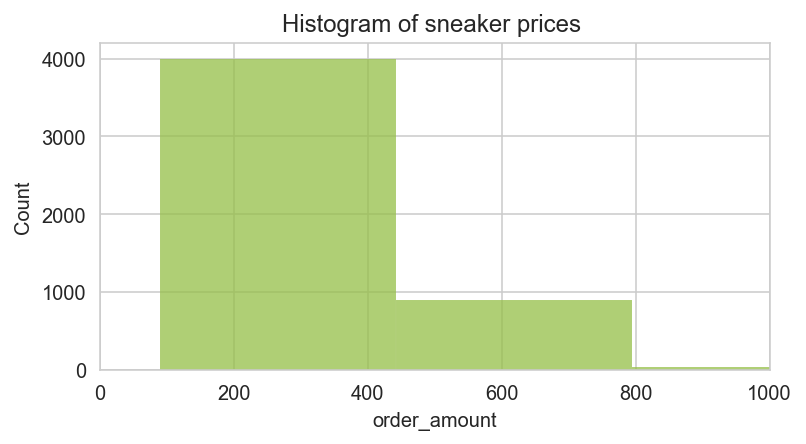

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

#Plotting histogram of prices
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (6, 3)})
hist=sns.histplot(df['order_amount'],bins=2000,color='#95BF47') #Shopify colors!
hist.set( xlim= (0,1000),title = "Histogram of sneaker prices ", ylabel = "Count")
print("")

[Text(0.5, 1.0, 'Boxplot of sneaker prices '), Text(0.5, 0, 'Prices')]

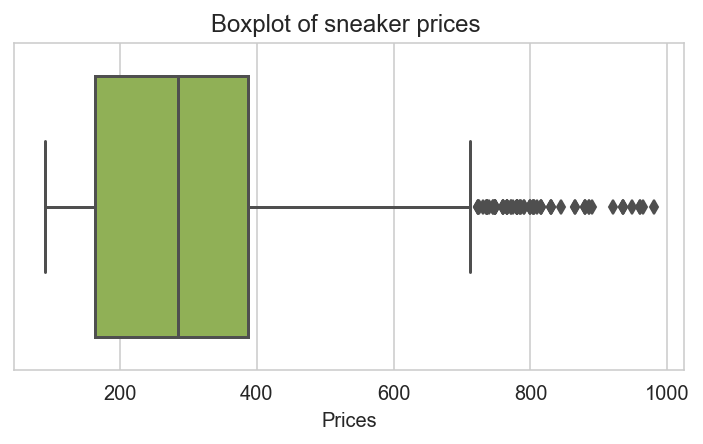

In [143]:
bx = sns.boxplot(x=df.loc[df["order_amount"] <= 1000]["order_amount"], color="#95BF47")
bx.set(title="Boxplot of sneaker prices ", xlabel="Prices")


#### Alternative Metrics

Instead of the mean, an alternative we can use here is the median. The median is less sensitive to outliers, so will give us a more accurate result in this scenario when our data is skewed. This is the metric I would report for this dataset.

In [144]:
print(
    f"The median price of shoes sold is ${np.median(df['order_amount'])}. I believe that this is a better estimate for average prices than the mean."
)


The median price of shoes sold is $284.0. I believe that this is a better estimate for average prices than the mean.
